<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Authors: Joseph Nelson (DC), Haley Boyan (DC), Sam Stack (DC)_

---

In [5]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [6]:
seeds = pd.read_csv("../data/seeds.csv")

In [7]:
# A:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Do some EDA of relationships between features.

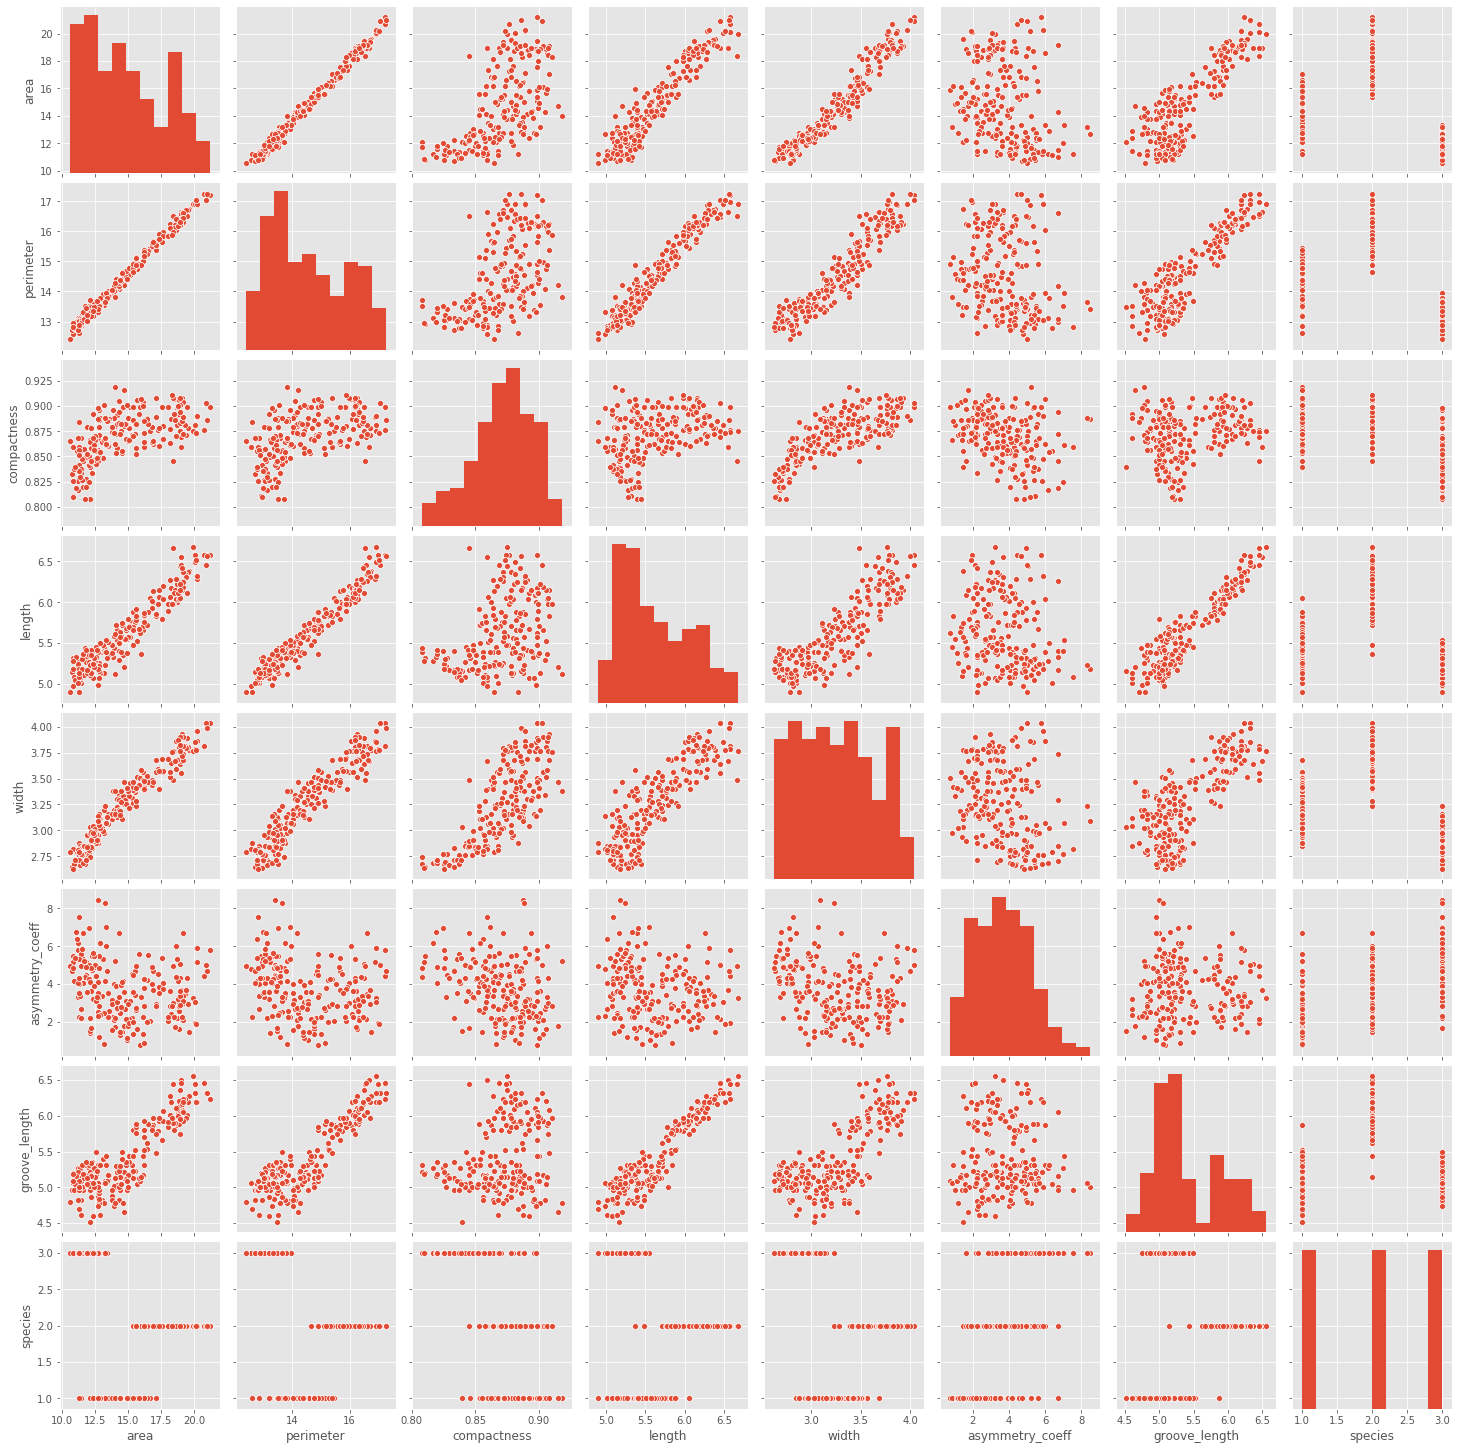

In [8]:
# Plot the Data to see the distributions/relationships
sns.pairplot(seeds)

In [14]:
# Check for nulls
seeds.isnull().sum(), seeds.isnull().sum().sum()

(area               0
 perimeter          0
 compactness        0
 length             0
 width              0
 asymmetry_coeff    0
 groove_length      0
 species            0
 dtype: int64,
 0)

In [15]:
# Look at the real species labels.
seeds.species.value_counts()

3    70
2    70
1    70
Name: species, dtype: int64

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [29]:
# A: 
seeds_without_species = seeds.iloc[:,:-1]
seeds_without_species

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [31]:
# Scale the data
from sklearn.preprocessing import StandardScaler
# initialize the scaler

sc = StandardScaler()


# fit the scaler to data
sc.fit(seeds_without_species)

# transform data
X_scaled = sc.transform(seeds_without_species)



In [45]:
from sklearn.cluster import KMeans
# specify the number of k
def results(no_k):
    k = no_k

# Initialize model
    K_means = KMeans(n_clusters=k, random_state=42)

# fit the data
    K_means.fit(X_scaled)
    # label_ return the labels of the cluster
    labels = K_means.labels_

    # cluster_centers_ returns the center pint for each cluster
    centroids = K_means.cluster_centers_

    # inertia measures the density of the cluster. remember lower is better!
    inertia = K_means.inertia_
    sil_score =silhouette_score(X_scaled, labels, metric='euclidean')
    
    return inertia, sil_score

results(8)

(240.63628460919008, 0.2503216831414212)

### 5. Get the labels and centroids for out first clustering model.

### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [35]:
from sklearn.metrics import silhouette_score

# A:
silhouette_score(X_scaled, labels, metric='euclidean')

0.4007270552751299

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [76]:
import random

results(3)

(430.65897315130053, 0.4007270552751299)

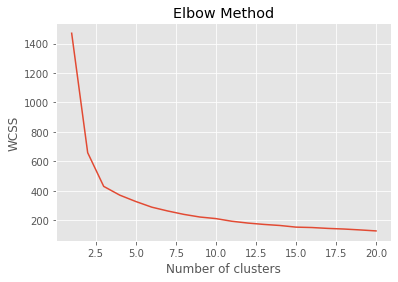

In [80]:
import random

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
# A:
results(3)

(430.65897315130053, 0.4007270552751299)

### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [56]:
# A:

seeds_without_species['labels'] = labels



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


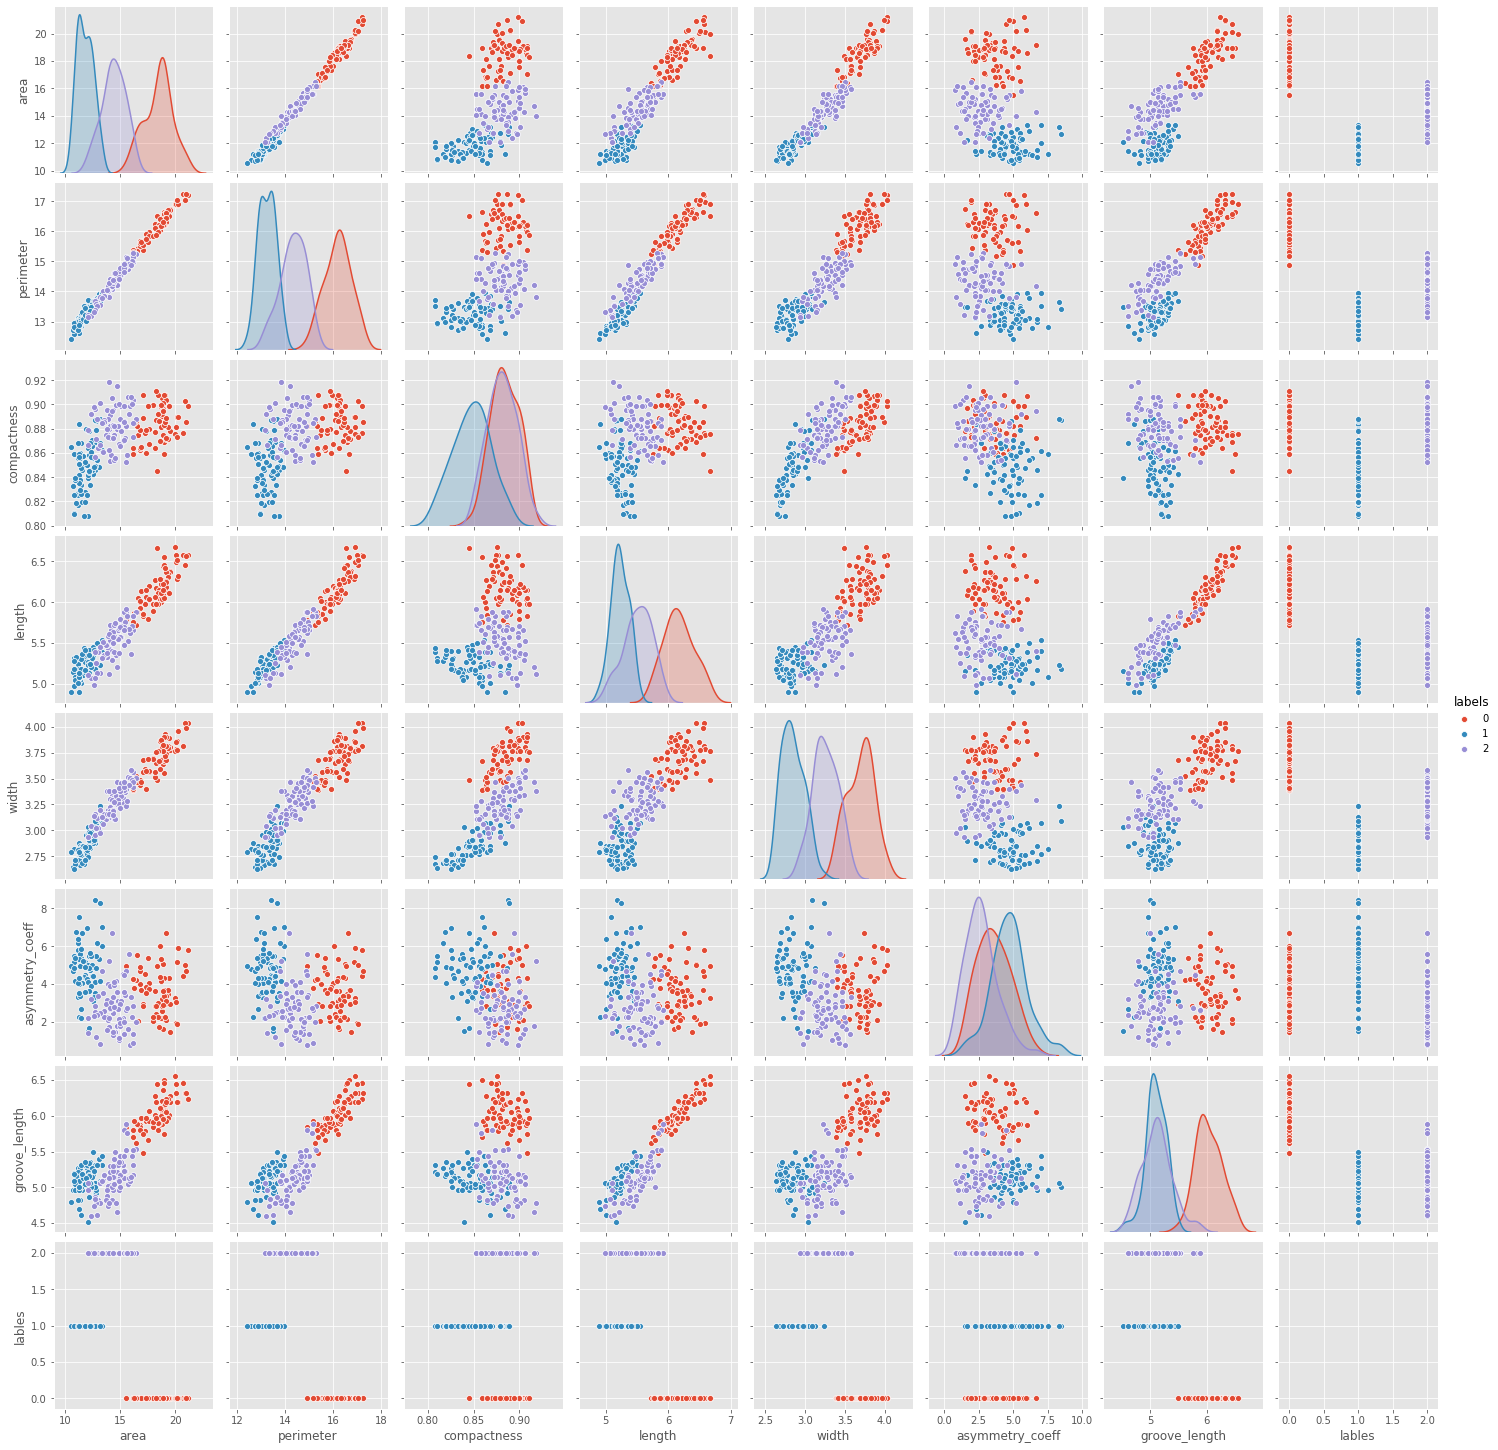

In [66]:
sns.pairplot(data=seeds_without_species, hue='labels')